In [1]:
from keras.layers import Dense, LSTM
from keras.models import Sequential
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def OHE_My_Sequence(list_of_sequences):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    
    #One hot encoding of the amino acid sequence
    final_ohe_seq = []
    for sequence in list_of_sequences:
        ohe_sequence = [[1 if amino_acid == char else 0 
                         for amino_acid in amino_acids] 
                         for char in sequence.strip('\n')]
        
        final_ohe_seq.append(ohe_sequence)
    
    #Determine the amino acid sequence with max length
    len_lists = [len(seq_lists) for seq_lists in final_ohe_seq]
    max_len = max(len_lists)
    
    #Append zeros to the one-hot-encoded form until the length matches the max length
    for seq_num, sequence in enumerate(final_ohe_seq):
        for i in range(max_len - len(sequence)):
            sequence = np.append(sequence, np.array([np.zeros(20)]), axis=0)
        
        final_ohe_seq[seq_num] = sequence
    
    return np.array(final_ohe_seq, dtype=int)
            

In [3]:
sequences = open('data/Data/Seq_With_Target/Sequence/all_seq.txt', 'r')
targets = open('data/Data/Seq_With_Target/Target/all_targ.txt', 'r')

array_ohe_seqs = OHE_My_Sequence(sequences)
array_targets = np.array([value.strip('\n') for value in targets])

In [4]:
#Split the data to training and test set (80:20)
x_train, x_test, y_train, y_test = train_test_split(array_ohe_seqs, 
                                                    array_targets, 
                                                    test_size=0.2, 
                                                    random_state=5)

In [5]:
#Check the dimensions of the training set
print(y_train.shape)
print(x_train.shape)

(4903,)
(4903, 41, 20)


In [6]:
#Create the architecture of the neural network
model = Sequential()

model.add(LSTM(128, activation='sigmoid', input_shape=(None, 20), return_sequences=True))
model.add(LSTM(128, activation='sigmoid', return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 128)         76288     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 208,001
Trainable params: 208,001
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train, y_train, epochs=10, batch_size=1, validation_data=(x_test, y_test))

Train on 4903 samples, validate on 1226 samples
Epoch 1/10
4903/4903 [==============================] - 202s 41ms/step - loss: 0.6944 - accuracy: 0.5566 - val_loss: 0.7004 - val_accuracy: 0.3989
Epoch 2/10
4903/4903 [==============================] - 199s 41ms/step - loss: 0.6851 - accuracy: 0.5752 - val_loss: 0.6609 - val_accuracy: 0.5237
Epoch 3/10
4903/4903 [==============================] - 203s 41ms/step - loss: 0.5346 - accuracy: 0.7659 - val_loss: 0.9600 - val_accuracy: 0.5881
Epoch 4/10
4903/4903 [==============================] - 201s 41ms/step - loss: 0.5077 - accuracy: 0.7858 - val_loss: 0.5498 - val_accuracy: 0.7781
Epoch 5/10
4903/4903 [==============================] - 193s 39ms/step - loss: 0.5098 - accuracy: 0.7946 - val_loss: 0.4511 - val_accuracy: 0.8173
Epoch 6/10
4903/4903 [==============================] - 193s 39ms/step - loss: 0.5101 - accuracy: 0.7942 - val_loss: 0.4135 - val_accuracy: 0.8295
Epoch 7/10
4903/4903 [==============================] - 197s 40ms/step

In [8]:
result = model.predict(x_test)

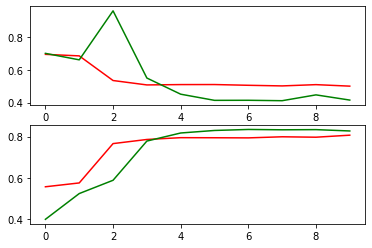

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(history.history['loss'], c='r')
ax1.plot(history.history['val_loss'], c='g')
ax2.plot(history.history['accuracy'], c='r')
ax2.plot(history.history['val_accuracy'], c='g')

plt.show()

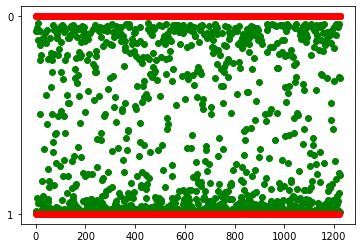

In [39]:
plt.scatter(range(1226), result, c='g')
plt.scatter(range(1226), y_test, c='r')

plt.show()

In [7]:
model2 = Sequential()

model2.add(LSTM(64, activation='sigmoid', input_shape=(None, 20), return_sequences=True))
model2.add(LSTM(64, activation='sigmoid', return_sequences=False))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 64)          21760     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 54,849
Trainable params: 54,849
Non-trainable params: 0
_________________________________________________________________


In [8]:
history2 = model2.fit(x_train, y_train, epochs=10, batch_size=1, validation_data=(x_test, y_test))

Train on 4903 samples, validate on 1226 samples
Epoch 1/10
4903/4903 [==============================] - 175s 36ms/step - loss: 0.6915 - accuracy: 0.5623 - val_loss: 0.6785 - val_accuracy: 0.6011
Epoch 2/10
4903/4903 [==============================] - 173s 35ms/step - loss: 0.6869 - accuracy: 0.5756 - val_loss: 0.6913 - val_accuracy: 0.6011
Epoch 3/10
4903/4903 [==============================] - 173s 35ms/step - loss: 0.6851 - accuracy: 0.5729 - val_loss: 0.6698 - val_accuracy: 0.6011
Epoch 4/10
4903/4903 [==============================] - 173s 35ms/step - loss: 0.5643 - accuracy: 0.7079 - val_loss: 0.4020 - val_accuracy: 0.8279
Epoch 5/10
4903/4903 [==============================] - 172s 35ms/step - loss: 0.4860 - accuracy: 0.7985 - val_loss: 0.4907 - val_accuracy: 0.8222
Epoch 6/10
4903/4903 [==============================] - 172s 35ms/step - loss: 0.4778 - accuracy: 0.8058 - val_loss: 0.3786 - val_accuracy: 0.8361
Epoch 7/10
4903/4903 [==============================] - 182s 37ms/step

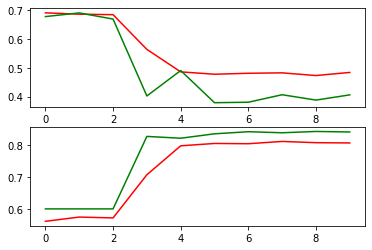

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(history2.history['loss'], c='r')
ax1.plot(history2.history['val_loss'], c='g')
ax2.plot(history2.history['accuracy'], c='r')
ax2.plot(history2.history['val_accuracy'], c='g')

plt.show()

In [74]:
result2 = model2.predict(x_test)

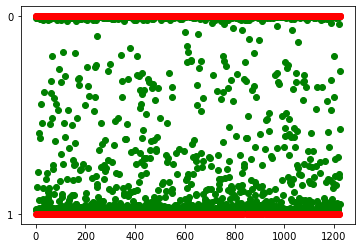

In [15]:
plt.scatter(range(1226), result2, c='g')
plt.scatter(range(1226), y_test, c='r')

plt.show()

In [58]:
y_test[1]

'0'

In [10]:
print(len(np.where(result <= 0.49)[0]))
print(len(np.where(result >= 0.51)[0]))

739
480


In [11]:
y_test_reshaped = np.array(y_test, dtype=int).reshape(1226, 1)
print(len(np.where(y_test_reshaped == 0)[0]))
print(len(np.where(y_test_reshaped == 1)[0]))

737
489


In [12]:
lower_bound = 0
for seq_num in np.where(result <= 0.49)[0]:
    if int(y_test[seq_num]) == 0:
        lower_bound += 1

print(lower_bound)

630


In [13]:
upper_bound = 0
for seq_num in np.where(result >= 0.51)[0]:
    if int(y_test[seq_num]) == 1:
        upper_bound += 1

print(upper_bound)

378


In [20]:
test1_data = ['AGTVYYP']
test1_data_processed = OHE_My_Sequence(test1_data)
test1_result = model.predict(test1_data_processed)
test1_result

array([[0.19930466]], dtype=float32)